In [1]:
import os
import numpy as np
import pandas as pd 

In [2]:
%matplotlib inline

In [3]:
BASE_DATASET = "../../data/mlspec-blackfriday/dataset/raw"
os.makedirs(BASE_DATASET, exist_ok=True)

In [4]:
!gsutil cp -r gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/* $BASE_DATASET/

Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/README.md...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/test.csv...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/train.csv...

Operation completed over 3 objects/33.5 MiB.                                     


In [4]:
TRAIN_SET = os.path.join(BASE_DATASET, 'train.csv')
df = pd.read_csv(TRAIN_SET)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [51]:
USER_COLUMNS = [
    'User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
    'Stay_In_Current_City_Years', 'Marital_Status'
]

df_totals = df.groupby(USER_COLUMNS).agg(
    {
        'Product_ID': 'count',
        'Purchase': ['count', 'sum', 'mean', 'max']
    }
)
df_totals.columns = ['_'.join(col) for col in df_totals.columns.values]
df_totals = df_totals.reset_index()

## Users distributions

### Distribution of users, per Gender

Text(0, 0.5, 'User count')

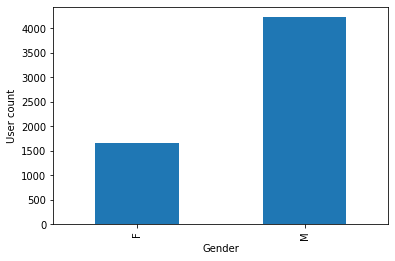

In [30]:
ax = df_totals.groupby(['Gender'])['User_ID'].count().plot.bar()
ax.set_ylabel('User count')

In [31]:
df_totals.groupby(['Gender'])['User_ID'].count()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

### Distribution of users, per Occupation & Gender

Text(0, 0.5, 'User count')

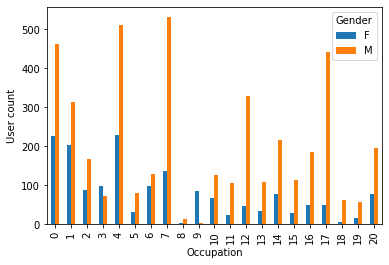

In [28]:
ax = df_totals.groupby(['Occupation', 'Gender'])['User_ID'].count().unstack().plot.bar()
ax.set_ylabel('User count')

### Distribution of users, per Occupation & Gender (fraction over Occupation)

Text(0, 0.5, 'User fraction')

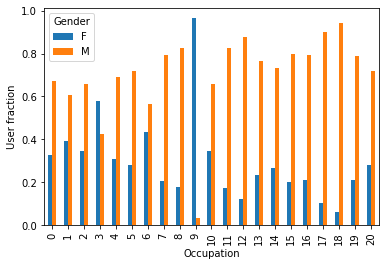

In [38]:
occupation_gender = df_totals.groupby(['Occupation', 'Gender'])['User_ID'].count()
occupation = df_totals.groupby(['Occupation'])['User_ID'].count()
ax = occupation_gender.div(occupation, level='Occupation').unstack().plot.bar()
ax.set_ylabel('User fraction')

### Users per city category

Text(0, 0.5, 'User count')

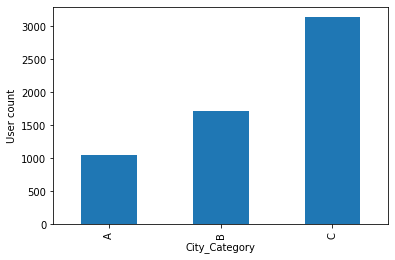

In [40]:
ax = df_totals.groupby(['City_Category'])['User_ID'].count().plot.bar()
ax.set_ylabel('User count')

### Users by number of year

Text(0, 0.5, 'User count')

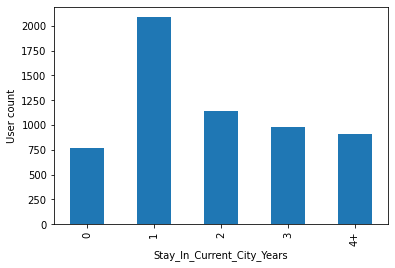

In [42]:
ax = df_totals.groupby(['Stay_In_Current_City_Years'])['User_ID'].count().plot.bar()
ax.set_ylabel('User count')

### Users by age

Text(0, 0.5, 'User count')

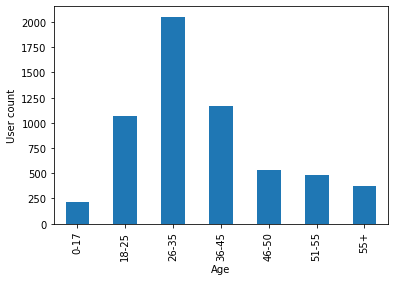

In [49]:
ax = df_totals.groupby(['Age'])['User_ID'].count().plot.bar()
ax.set_ylabel('User count')

## Purchases distributions

### Purchases per Occupation

Text(0, 0.5, 'Purchase count')

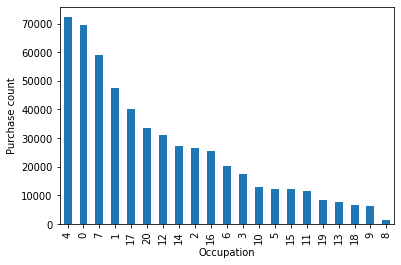

In [45]:
ax = df_totals.groupby(['Occupation'])['Purchase_count'].sum().sort_values(ascending=False).plot.bar()
ax.set_ylabel('Purchase count')

### Purchases per Occupation & Gender

Text(0, 0.5, 'Purchase count')

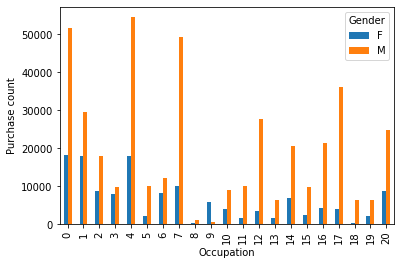

In [46]:
ax = df_totals.groupby(['Occupation', 'Gender'])['Purchase_count'].sum().unstack().plot.bar()
ax.set_ylabel('Purchase count')

### Purchases per City Category

Text(0, 0.5, 'Purchase count')

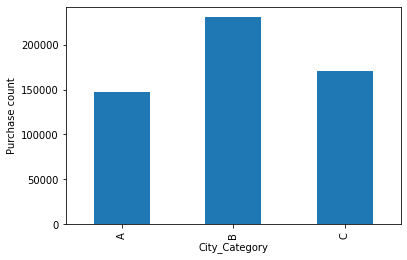

In [47]:
ax = df_totals.groupby(['City_Category'])['Purchase_count'].sum().plot.bar()
ax.set_ylabel('Purchase count')

### Purchases per number of years

Text(0, 0.5, 'Purchase count')

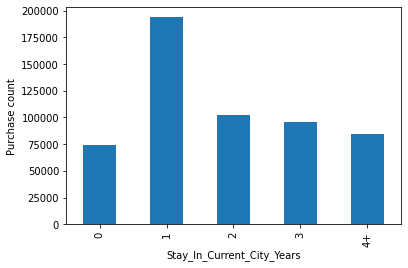

In [48]:
ax = df_totals.groupby(['Stay_In_Current_City_Years'])['Purchase_count'].sum().plot.bar()
ax.set_ylabel('Purchase count')

### Purchases by age

Text(0, 0.5, 'Purchase count')

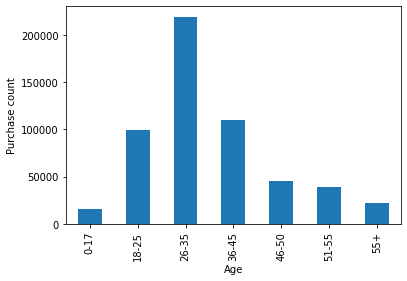

In [50]:
ax = df_totals.groupby(['Age'])['Purchase_count'].sum().plot.bar()
ax.set_ylabel('Purchase count')